In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = r"C:\Users\Abhim\Documents\Python_Programs\materna_trace_set\GWA-T-13_Materna-Workload-Traces\Materna-Trace-1\first_eight.csv"

df = pd.read_csv(file)
df.head()


,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,01.12.2015 00:00:00,2,0,130,2.83,4194304,452565,10.79,0,12,54,387,292
1,01.12.2015 00:00:00,4,0,356,3.71,8388608,217265,2.59,0,1,100,4,2
2,01.12.2015 00:00:00,2,0,77,1.69,8388608,943718,11.25,0,7,64,6,6
3,01.12.2015 00:00:00,1,0,26,1.25,2097152,101712,4.85,0,0,22,1,1
4,01.12.2015 00:00:00,2,0,96,2.11,4194304,164417,3.92,0,14,54,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66528 entries, 0 to 66527
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Timestamp                              66528 non-null  object 
 1   CPU cores                              66528 non-null  int64  
 2   CPU capacity provisioned [MHZ]         66528 non-null  int64  
 3   CPU usage [MHZ]                        66528 non-null  int64  
 4   CPU usage [%]                          66528 non-null  float64
 5   Memory capacity provisioned [KB]       66528 non-null  int64  
 6   Memory usage [KB]                      66528 non-null  int64  
 7   Memory usage [%]                       66528 non-null  float64
 8   Disk read throughput [KB/s]            66528 non-null  int64  
 9   Disk write throughput [KB/s]           66528 non-null  int64  
 10  Disk size [GB]                         66528 non-null  int64  
 11  Ne

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d.%m.%Y %H:%M:%S")
#drop the column cpu capacity provisioned

df.drop('CPU capacity provisioned [MHZ]', axis=1, inplace=True)

<Axes: >

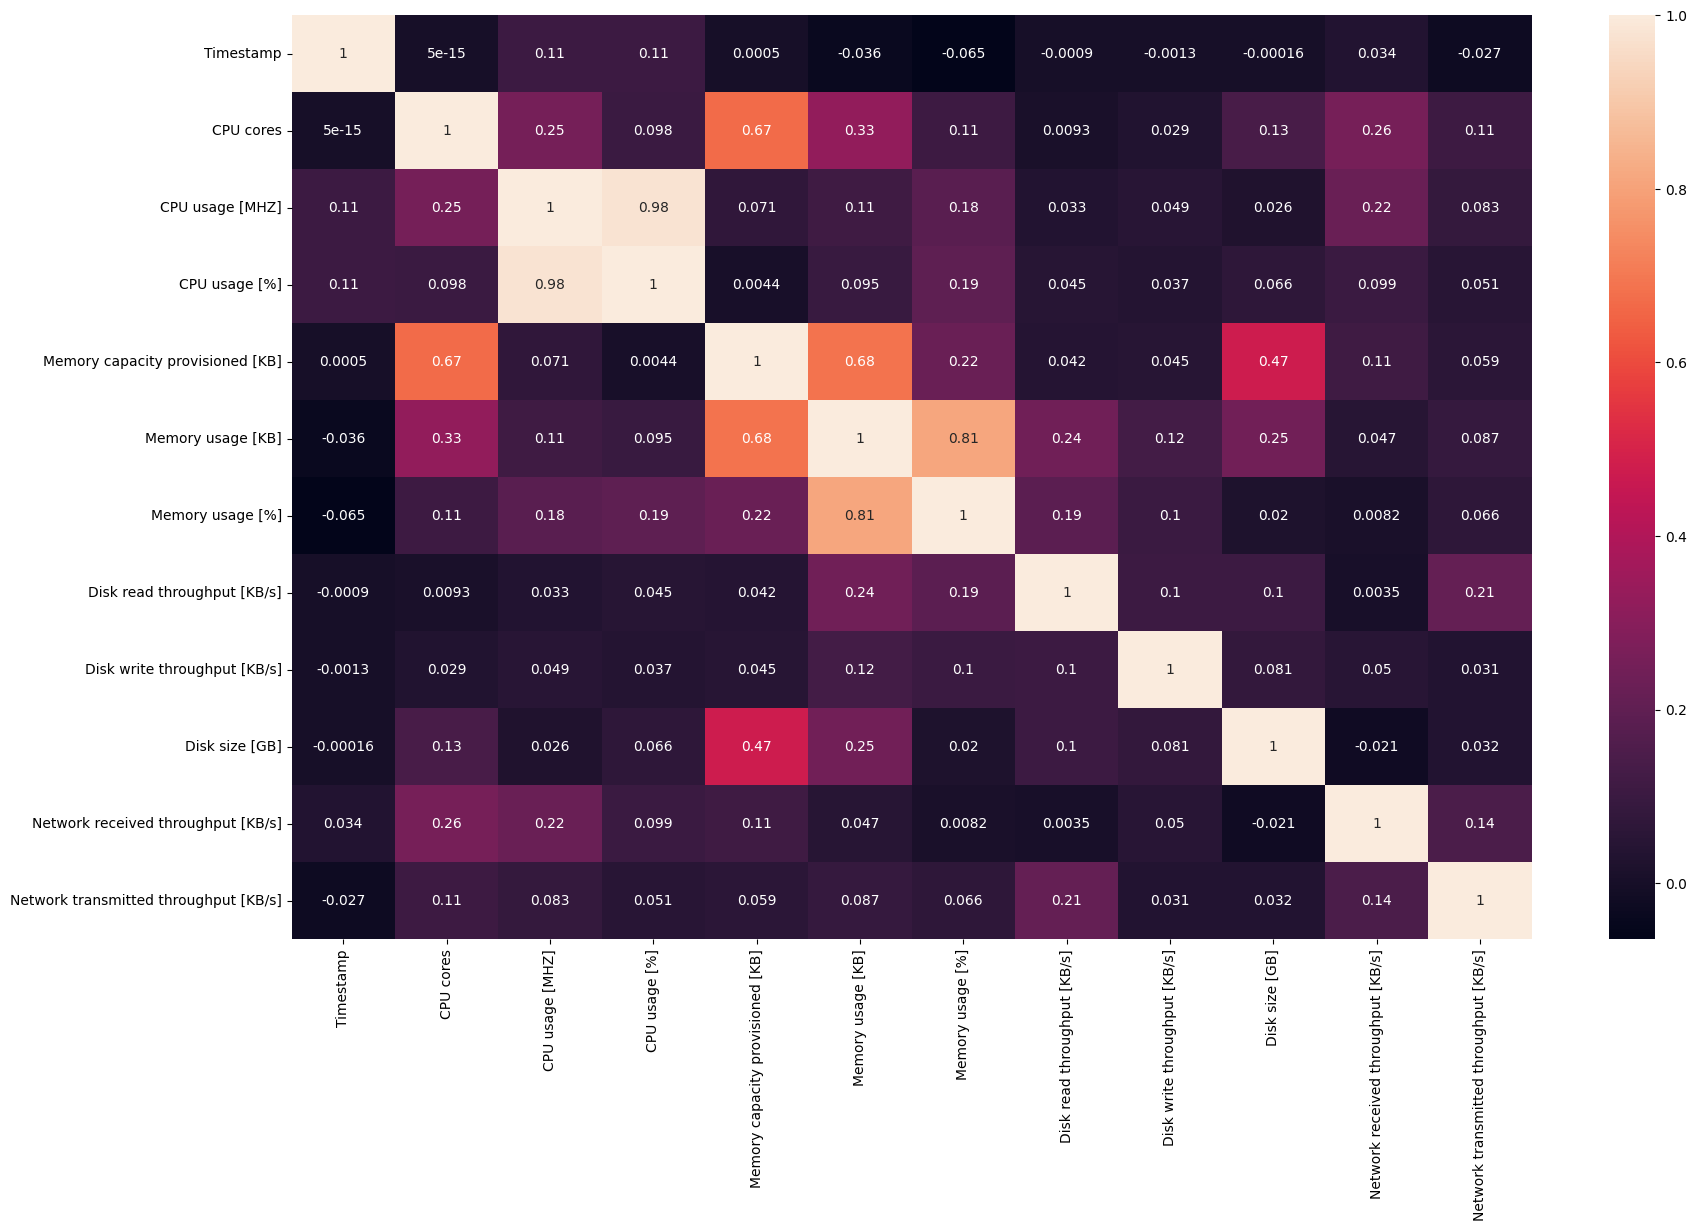

In [6]:
import seaborn as sns

df_corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, annot=True)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
df.head()

y = df["Memory usage [KB]"]

df

C:\Users\Abhim\AppData\Local\Temp\ipykernel_2476\2643736765.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 1.         0.33333333 ... 0.         0.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
C:\Users\Abhim\AppData\Local\Temp\ipykernel_2476\2643736765.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02169586 0.06667994 0.0111465  ... 0.00099522 0.0053742  0.06966561]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
C:\Users\Abhim\AppData\Local\Temp\ipykernel_2476\2643736765.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 1.      

,Timestamp,CPU cores,CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,2015-12-01 00:00:00,0.333333,0.021696,0.024887,0.333333,0.051840,0.100073,0.000000,0.000281,0.060150,0.078245,0.006928
1,2015-12-01 00:00:00,1.000000,0.066680,0.033718,1.000000,0.022845,0.014594,0.000000,0.000023,0.146617,0.000809,0.000047
2,2015-12-01 00:00:00,0.333333,0.011146,0.013447,1.000000,0.112363,0.104868,0.000000,0.000164,0.078947,0.001213,0.000142
3,2015-12-01 00:00:00,0.000000,0.000995,0.009032,0.000000,0.008606,0.038153,0.000000,0.000000,0.000000,0.000202,0.000024
4,2015-12-01 00:00:00,0.333333,0.014928,0.017662,0.333333,0.016332,0.028458,0.000000,0.000327,0.060150,0.000202,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...
66523,2015-11-30 23:55:00,0.333333,0.009355,0.011540,1.000000,0.117945,0.110497,0.000000,0.000187,0.078947,0.001011,0.000119
66524,2015-11-30 23:55:00,0.333333,0.038217,0.056197,1.000000,0.122080,0.114667,0.000106,0.001122,1.000000,0.002224,0.005931
66525,2015-11-30 23:55:00,0.000000,0.000995,0.009032,0.000000,0.007572,0.033983,0.000000,0.000023,0.000000,0.000202,0.000024
66526,2015-11-30 23:55:00,0.000000,0.005374,0.019468,0.000000,0.005168,0.024289,0.000000,0.000023,0.000000,0.051961,0.005860


C:\Users\Abhim\AppData\Local\Temp\ipykernel_2476\3547025810.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  decompose.plot().show()


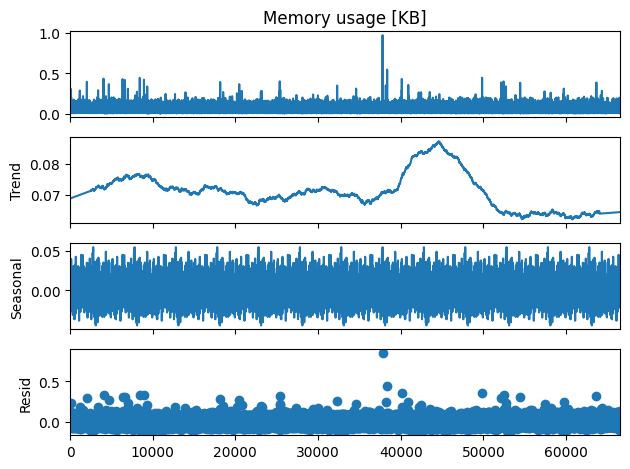

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(y[::5], model='additive', extrapolate_trend='freq', period = 1000)

decompose.plot().show()

In [9]:
import tensorflow as tf
import os

In [10]:
df = df.drop(columns = ['Timestamp'])

In [11]:
train_df,test_df = df[:60000], df[60000:] 
len(train_df), len(test_df)

X = train_df.drop(columns = ['Memory usage [KB]'])
y = train_df['Memory usage [KB]']

X_test = test_df.drop(columns = ['Memory usage [KB]'])
y_test = test_df['Memory usage [KB]']



def sliding_window_X(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size])
    return np.array(X)

def sliding_window_y(data, window_size):
    y = []
    for i in range(len(data) - window_size):
        y.append(data.iloc[i+window_size])
    return np.array(y)

window_size = 10
X_train = sliding_window_X(X, window_size)
y_train = sliding_window_y(y, window_size)

X_test = sliding_window_X(X_test, window_size)
y_test = sliding_window_y(y_test, window_size)

X_train.shape, y_train.shape

((59990, 10, 10), (59990,))

In [12]:
print (len(y_test))
print (len(X_train))

6518
59990


In [13]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [14]:
n_past = 10
n_future = 1
n_features = 11

In [15]:
X_train, y_train = split_series(train_df.values,n_past, n_future)

X_test, y_test = split_series(test_df.values,n_past, n_future)

In [16]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 11)]             0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 10, 100),            44800     ['input_1[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 lstm_1 (LSTM)               [(None, 100),                80400     ['lstm[0][0]']                
                              (None, 100),                                                    

In [52]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Activation, dot, concatenate, Bidirectional

# encoder_inputs = Input(shape=(n_past, n_features))

# # Bidirectional LSTM layer 1
# encoder_l1 = Bidirectional(LSTM(100, return_sequences=True, return_state=True))
# encoder_outputs1, forward_h1, forward_c1, backward_h1, backward_c1 = encoder_l1(encoder_inputs)

# # Combine forward and backward states
# state_h1 = concatenate([forward_h1, backward_h1], axis=-1)
# state_c1 = concatenate([forward_c1, backward_c1], axis=-1)

# # Bidirectional LSTM layer 2
# encoder_l2 = Bidirectional(LSTM(100, return_sequences=True, return_state=True))
# encoder_outputs2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_l2(encoder_outputs1)

# # Combine forward and backward states
# state_h2 = concatenate([forward_h2, backward_h2], axis=-1)
# state_c2 = concatenate([forward_c2, backward_c2], axis=-1)

# # Decoder
# decoder_inputs = RepeatVector(n_future)(state_h2)  # Use state_h2 as the context for decoder inputs

# # Since we need to use Bidirectional layers for the decoder too, make sure their state sizes match
# decoder_l1 = Bidirectional(LSTM(100, return_sequences=True, return_state=True))
# decoder_l1_outputs, _, _ = decoder_l1(decoder_inputs, initial_state=[state_h1, state_c1])

# decoder_l2 = Bidirectional(LSTM(100, return_sequences=True, return_state=True))
# decoder_l2_outputs, _, _ = decoder_l2(decoder_l1_outputs, initial_state=[state_h2, state_c2])

# # Attention mechanism
# attention = dot([decoder_l2_outputs, encoder_outputs2], axes=[2, 2])
# attention = Activation('softmax')(attention)

# context = dot([attention, encoder_outputs2], axes=[2, 1])

# # Concatenate context with decoder outputs
# decoder_combined_context = concatenate([context, decoder_l2_outputs], axis=-1)

# decoder_outputs2 = TimeDistributed(Dense(n_features))(decoder_combined_context)

# # Model
# model = tf.keras.models.Model(encoder_inputs, decoder_outputs2)

# model.summary()


In [33]:
import tensorflow as tf
from tf.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Activation, dot, concatenate

# Encoder
encoder_inputs = Input(shape=(n_past, n_features))
encoder_l1 = LSTM(100, return_sequences=True, return_state=True)
encoder_outputs1, state_h1, state_c1 = encoder_l1(encoder_inputs)
encoder_states1 = [state_h1, state_c1]

encoder_l2 = LSTM(100, return_sequences=True, return_state=True)
encoder_outputs2, state_h2, state_c2 = encoder_l2(encoder_outputs1)
encoder_states2 = [state_h2, state_c2]

# Decoder
decoder_inputs = RepeatVector(n_future)(state_h2)  # Use state_h2 as the context for decoder inputs

decoder_l1 = LSTM(100, return_sequences=True)(decoder_inputs, initial_state=encoder_states1)
decoder_l2 = LSTM(100, return_sequences=True)(decoder_l1, initial_state=encoder_states2)

# Attention mechanism
attention = dot([decoder_l2, encoder_outputs2], axes=[2, 2])
attention = Activation('softmax')(attention)

context = dot([attention, encoder_outputs2], axes=[2, 1])

# Concatenate context with decoder outputs
decoder_combined_context = concatenate([context, decoder_l2], axis=-1)

decoder_outputs2 = TimeDistributed(Dense(n_features))(decoder_combined_context)

# Model
model = tf.keras.models.Model(encoder_inputs, decoder_outputs2)

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 10, 11)]             0         []                            
                                                                                                  
 lstm_16 (LSTM)              [(None, 10, 100),            44800     ['input_5[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 lstm_17 (LSTM)              [(None, 10, 100),            80400     ['lstm_16[0][0]']             
                              (None, 100),                                                  

In [35]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.1 * 0.90 ** x)

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics = ['mae', 'mse', 'mape', 'accuracy'])
history_e2d2=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [37]:
pred_e2d2=model.predict(X_test)

pred_e2d2.shape

204/204 [==============================] - 2s 4ms/step


(6518, 1, 11)

In [39]:
print(pred_e2d2[0])

[[ 0.36434639  0.02130295  0.02522339  0.54400545  0.06512052  0.08807224
  -0.00061068 -0.00084838  0.09935659 -0.00247031  0.00194279]]


In [43]:
training_accuracy = history_e2d2.history['accuracy']

validation_accuracy = history_e2d2.history['val_accuracy']

training_loss = history_e2d2.history['loss']

validation_loss = history_e2d2.history['val_loss']

mse = history_e2d2.history['mse']

mae = history_e2d2.history['mae']

mape = history_e2d2.history['mape']

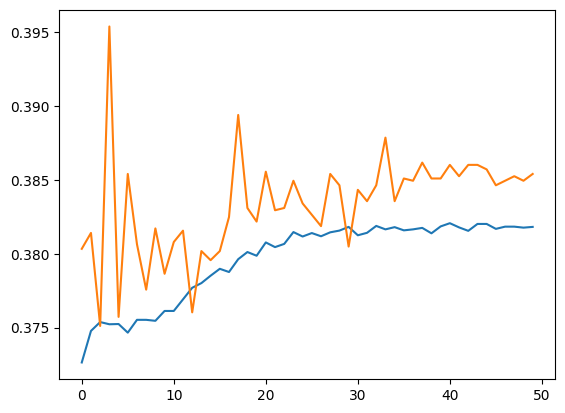

In [44]:
plt.plot (training_accuracy)
plt.plot (validation_accuracy)

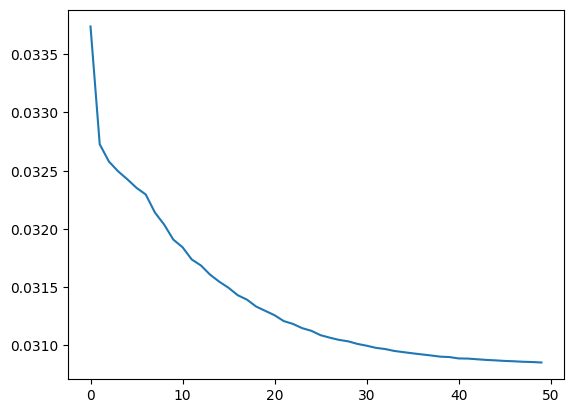

In [45]:
plt.plot (mse)

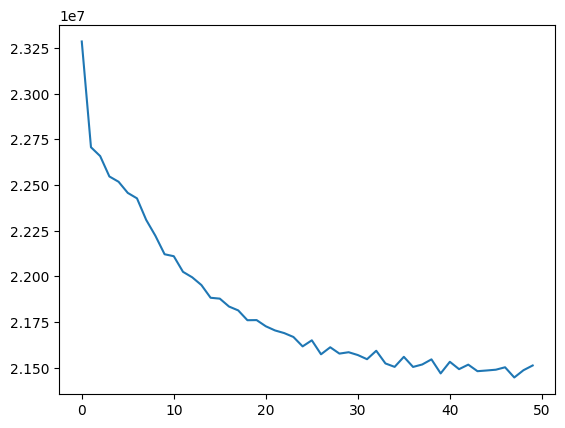

In [46]:
plt.plot (mape)